In [1]:
import pandas as pd 
import numpy as np
import matplotlib as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


### EDA
Prediction optimization fertilizers


In [2]:
test_data = pd.read_csv('test.csv')
training_data = pd.read_csv('train.csv')
training_data.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


In [3]:
# training_data.columns = training_data.columns.str.replace(' ','_',regex= False)
# test_data.columns = test_data.columns.str.replace(' ','_',regex= False)
# training_data.columns

In [4]:
# Encode training and test datasets separately
# training_data_encoded = pd.get_dummies(training_data, columns=['Soil_Type', 'Crop_Type'])
test_data_encoded = pd.get_dummies(test_data, columns=['Soil Type', 'Crop Type'])

# Preview the first few rows
# training_data_encoded.head()
# training_data['Soil_Type'].value_counts()
# training_data['Crop_Type'].value_counts()

In [6]:
test_data_encoded.columns



Index(['id', 'Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium',
       'Phosphorous', 'Soil Type_Black', 'Soil Type_Clayey', 'Soil Type_Loamy',
       'Soil Type_Red', 'Soil Type_Sandy', 'Crop Type_Barley',
       'Crop Type_Cotton', 'Crop Type_Ground Nuts', 'Crop Type_Maize',
       'Crop Type_Millets', 'Crop Type_Oil seeds', 'Crop Type_Paddy',
       'Crop Type_Pulses', 'Crop Type_Sugarcane', 'Crop Type_Tobacco',
       'Crop Type_Wheat'],
      dtype='object')

In [7]:
le = LabelEncoder()
y = le.fit_transform(training_data_encoded['Fertilizer_Name'])

# training_features = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium',
#        'Phosphorous', 'Soil_Type_Black', 'Soil_Type_Clayey',
#        'Soil_Type_Loamy', 'Soil_Type_Red', 'Soil_Type_Sandy',
#        'Crop_Type_Barley', 'Crop_Type_Cotton', 'Crop_Type_Ground Nuts',
#        'Crop_Type_Maize', 'Crop_Type_Millets', 'Crop_Type_Oil seeds',
#        'Crop_Type_Paddy', 'Crop_Type_Pulses', 'Crop_Type_Sugarcane',
#        'Crop_Type_Tobacco', 'Crop_Type_Wheat']
training_features = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium',
       'Phosphorous', 'Soil_Type_Black', 'Soil_Type_Clayey',
       'Soil_Type_Loamy', 'Soil_Type_Red', 'Soil_Type_Sandy',]
X = training_data_encoded[training_features]
X.describe()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 42)

NameError: name 'training_data_encoded' is not defined

### Random FrestClassifier


In [ ]:
forest = RandomForestClassifier(n_estimators = 100, max_depth=5, random_state= 42)
forest.fit(X_train,y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
y_pred_forest = forest.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))


Accuracy: 0.16104646464646466
              precision    recall  f1-score   support

           0       0.16      0.25      0.20     37465
           1       0.16      0.56      0.25     37584
           2       0.17      0.06      0.09     37454
           3       0.17      0.04      0.07     36590
           4       0.17      0.15      0.16     36823
           5       0.00      0.00      0.00     31462
           6       0.00      0.00      0.00     30122

    accuracy                           0.16    247500
   macro avg       0.12      0.15      0.11    247500
weighted avg       0.12      0.16      0.11    247500



/Users/danielblasczyk/Library/CloudStorage/GoogleDrive-blasczykawr@gmail.com/My Drive/Kaggle/Kaggle_playground_projects/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/danielblasczyk/Library/CloudStorage/GoogleDrive-blasczykawr@gmail.com/My Drive/Kaggle/Kaggle_playground_projects/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/danielblasczyk/Library/CloudStorage/GoogleDrive-blasczykawr@gmail.com/My Drive/Kaggle/Kaggle_playground_projects/venv/lib/p

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(
    objective='multi:softmax',  # for multi-class classification
    num_class=7,                # number of unique classes in your target
    eval_metric='mlogloss',     # common multiclass metric
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

/Users/danielblasczyk/Library/CloudStorage/GoogleDrive-blasczykawr@gmail.com/My Drive/Kaggle/Kaggle_playground_projects/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [12:22:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.1901979797979798
              precision    recall  f1-score   support

           0       0.19      0.22      0.21     37465
           1       0.19      0.26      0.22     37584
           2       0.19      0.23      0.21     37454
           3       0.19      0.19      0.19     36590
           4       0.19      0.21      0.20     36823
           5       0.19      0.11      0.14     31462
           6       0.18      0.07      0.10     30122

    accuracy                           0.19    247500
   macro avg       0.19      0.18      0.18    247500
weighted avg       0.19      0.19      0.18    247500



In [ ]:
from sklearn.utils.class_weight import compute_sample_weight

sample_weights = compute_sample_weight('balanced', y_train)
model.fit(X_train, y_train, sample_weight=sample_weights)

/Users/danielblasczyk/Library/CloudStorage/GoogleDrive-blasczykawr@gmail.com/My Drive/Kaggle/Kaggle_playground_projects/venv/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [12:24:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'multi:softmax'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Load and encode
df = pd.read_csv("train.csv")

df = pd.get_dummies(df, columns=['Soil Type', 'Crop Type'])

le = LabelEncoder()
y = le.fit_transform(df['Fertilizer Name'])

X = df.drop(columns=['id', 'Fertilizer Name'])  # Drop ID + target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    eval_metric='mlogloss'
)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

    10-26-26       0.20      0.23      0.21     22841
    14-35-14       0.20      0.26      0.22     22639
    17-17-17       0.20      0.23      0.22     22764
       20-20       0.19      0.20      0.19     22010
       28-28       0.19      0.21      0.20     22384
         DAP       0.20      0.13      0.16     19148
        Urea       0.19      0.08      0.11     18214

    accuracy                           0.20    150000
   macro avg       0.19      0.19      0.19    150000
weighted avg       0.19      0.20      0.19    150000



In [11]:
test_data_encoded.columns
features = ['Temparature', 'Humidity', 'Moisture', 'Nitrogen', 'Potassium',
       'Phosphorous', 'Soil Type_Black', 'Soil Type_Clayey', 'Soil Type_Loamy',
       'Soil Type_Red', 'Soil Type_Sandy', 'Crop Type_Barley',
       'Crop Type_Cotton', 'Crop Type_Ground Nuts', 'Crop Type_Maize',
       'Crop Type_Millets', 'Crop Type_Oil seeds', 'Crop Type_Paddy',
       'Crop Type_Pulses', 'Crop Type_Sugarcane', 'Crop Type_Tobacco',
       'Crop Type_Wheat']

In [12]:
test_X = test_data_encoded[features]

# make predictions which we will submit. 
test_preds = model.predict(test_X)

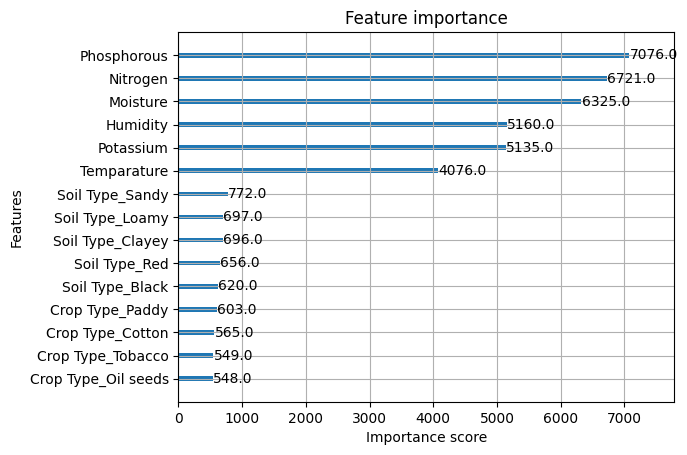

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(model, max_num_features=15)
plt.show()


In [16]:


output = pd.DataFrame({'Id': test_data.id,
                       'Fertilizer Name': le.inverse_transform(test_preds)})
output.to_csv('submission.csv', index=False)